<a href="https://colab.research.google.com/github/fabriziobasso/kaggle/blob/main/congestion_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Studies: Tabular Playground Series - Mar 2022

[Link](https://www.kaggle.com/competitions/tabular-playground-series-mar-2022/data)

Based on the following Notebooks:
1. [TFT Model](https://www.kaggle.com/code/abdulravoofshaik/private-lb-top-2-google-s-tft)
2. [Competition Winner](https://www.kaggle.com/competitions/tabular-playground-series-mar-2022/discussion/316271)

### Dataset Description
In this competition, you'll forecast twelve-hours of traffic flow in a major U.S. metropolitan area. Time, space, and directional features give you the chance to model interactions across a network of roadways.


Files and Field Descriptions

* **train.csv** - the training set, comprising measurements of traffic congestion across 65 roadways from April through September of 1991.
  * row_id - a unique identifier for this instance
  * time - the 20-minute period in which each measurement was taken
  * x - the east-west midpoint coordinate of the roadway
  * y - the north-south midpoint coordinate of the roadway
  * direction - the direction of travel of the roadway. EB indicates "eastbound" travel, for example, while SW indicates a "southwest" direction of travel.
congestion - congestion levels for the roadway during each hour; the target. The congestion measurements have been normalized to the range 0 to 100.

* **test.csv** - the test set; you will make hourly predictions for roadways identified by a coordinate location and a direction of travel on the day of 1991-09-30.
* **sample_submission.csv** - a sample submission file in the correct format

## 1.0 Install Packages:

In [1]:
%%capture
!pip install tensorflow-addons
#!pip install shap
#!pip install eli5
#!pip install tf-nightly
#!pip install -U scikit-learn==1.2.0
#!pip install catboost
#!pip install haversine
!pip install pytorch-forecasting
!pip install umap-learn
#!pip install reverse_geocoder
#!pip install --upgrade protobuf
!pip install colorama
!pip install imbalanced-learn
!pip install optuna
!pip install optuna-integration
#!pip install pygam
!pip install keras-tuner --upgrade
#!pip install pycaret
!pip install lightning==2.0.1

## **2.0 Packages**

In [2]:
from pytorch_forecasting import Baseline, TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import SMAPE, PoissonLoss, QuantileLoss
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
from pytorch_lightning.loggers import TensorBoardLogger
import torch

In [3]:
#importing modules

import warnings
warnings.filterwarnings('ignore')
import time
t = time.time()

print('Importing started...')

# basic moduele
import os
import numpy as np
import pandas as pd
import re
#from scipy import stats
from random import randint
import random
import math
import os
import gc
import pickle
from glob import glob
from IPython import display as ipd
from tqdm import tqdm
from datetime import datetime
from joblib import dump, load
import sklearn as sk
from imblearn.over_sampling import SMOTE, RandomOverSampler
from functools import partial
import itertools
from itertools import combinations
import IPython
import IPython.display

# visualization moduels
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib_venn import venn2_unweighted
import seaborn as sns
import missingno as msno
import imblearn

# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# Style Import
from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

# preprocessing modules
from sklearn.model_selection import (train_test_split,
                                     KFold,
                                     StratifiedKFold,
                                     cross_val_score,
                                     GroupKFold,
                                     GridSearchCV,
                                     RepeatedStratifiedKFold)

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   LabelEncoder,
                                   OrdinalEncoder,
                                   PolynomialFeatures)

from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import SelectFromModel


# metrics
from sklearn.metrics import (mean_squared_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss)


# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  TweedieRegressor,
                                  ARDRegression,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.isotonic import IsotonicRegression

from sklearn.ensemble import (AdaBoostRegressor,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              StackingRegressor,
                              HistGradientBoostingClassifier,
                              ExtraTreesClassifier)

from sklearn.base import BaseEstimator, TransformerMixin

# Other Models
#from pygam import LogisticGAM, s, te
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

#import catboost as cat
#from catboost import CatBoost, CatBoostRegressor
#from catboost import CatBoostClassifier

#from catboost.utils import get_roc_curve

from lightgbm import early_stopping
# check installed version
#import pycaret

from sklearn.base import clone ## sklearn base models for stacked ensemble model
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

#Interpretiability of the model
#import shap
#import eli5
#from eli5.sklearn import PermutationImportance


## miss
from sklearn.pipeline import (make_pipeline,
                              Pipeline)


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.backend as K
import tensorflow_addons as tfa
from keras.utils import FeatureSpace

# Import libraries for Hypertuning
import kerastuner as kt
from kerastuner.tuners import RandomSearch, GridSearch, BayesianOptimization
# Model Tuning tools:
import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour
%matplotlib inline
SEED = 1984
N_SPLITS = 10

print('Done, All the required modules are imported. Time elapsed: {} sec'.format(time.time()-t))

Importing started...
Done, All the required modules are imported. Time elapsed: 6.564371585845947 sec


<Figure size 640x480 with 0 Axes>

In [4]:
# Check Versions:
print("CHECK VERSIONS:")
print(f"sns: {sns.__version__}")
print(f"mpl: {mpl.__version__}")
print(f"tensorflow: {tf.__version__}")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"scikit-learn: {sk.__version__}")
#print(f"statsmodels: {stm.__version__}")
print(f"missingno: {msno.__version__}")
#print(f"TF-addon: {tfa.__version__}")
print(f"Inbalance_Learning: {imblearn.__version__}")
print(f"XGBoost: {xgb.__version__}")
#print(f"CatBoost: {cat.__version__}")
#print(f"PyCaret: {pycaret.__version__}")

CHECK VERSIONS:
sns: 0.12.2
mpl: 3.7.1
tensorflow: 2.12.0
pandas: 1.5.3
numpy: 1.23.5
scikit-learn: 1.2.2
missingno: 0.5.2
Inbalance_Learning: 0.10.1
XGBoost: 1.7.6


**Settings:**

In [5]:
tf.random.set_seed(0)
np.random.seed(0)
random.seed(42)

SEED = 42
def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.compat.v1.set_random_seed(seed)
    session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
    sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
    tf.compat.v1.keras.backend.set_session(sess)

seed_everything(SEED)

In [6]:
input_seq_length = 48
output_seq_length = 24

lr = 0.001
num_epochs = 100
batch_size = 128
hidden_size = 32
num_gru_layers = 1
grad_clip = 1.0
scheduled_sampling_decay = 10
dropout = 0.25

### **2.1 Connect Drives**

Verify System:

In [7]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


Connect to Google Drive:

In [8]:
%%capture
# Connect to Colab:
from google.colab import drive
drive.mount('/content/drive')

In [9]:
folder_data = "/content/drive/MyDrive/Exercises/Time_Series_Studies/Data/congestion_data"
folder_train_valid = "/content/drive/MyDrive/Exercises/Time_Series_Studies/Data/congestion_data/train_valid_data"
models_folders = "/content/drive/MyDrive/Exercises/Time_Series_Studies/Models/congestion_data/TS_Study_0"
folders_nn = "/content/drive/MyDrive/Exercises/Time_Series_Studies/Models/TS_Study_0/congestion_data/neural_networks/"

list_directories = [folder_data,folder_train_valid,models_folders,folders_nn]

for path in list_directories:
  try:
      os.mkdir(path)
  except OSError as error:
      print(f"{path} already exists")


os.chdir(folder_data)

/content/drive/MyDrive/Exercises/Time_Series_Studies/Data/congestion_data already exists
/content/drive/MyDrive/Exercises/Time_Series_Studies/Data/congestion_data/train_valid_data already exists
/content/drive/MyDrive/Exercises/Time_Series_Studies/Models/congestion_data/TS_Study_0 already exists
/content/drive/MyDrive/Exercises/Time_Series_Studies/Models/TS_Study_0/congestion_data/neural_networks/ already exists


### 2.2 Utility Functions:

#### 2.2.1 Visualization Utilities:

In [10]:
cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:hover',
    'props': [('background-color', '#ffffb3')]
}
index_names = {
    'selector': '.index_name',
    'props': 'font-style: italic; color: darkgrey; font-weight:normal;'
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000000; color: white;'
}
from IPython.display import HTML

def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

#### 2.2.2 Utility Functions:

* Notes for feature engineering: Congestion depends on the following

1) Time of the day ( peak time or off peak time)

2) Day of the week (is it Sunday, Monday, Tuesday....)

3) Is it weekend?

4) direction of the flow.

Keeping the above things in mind, we need to extract all the above features

In [11]:
from sklearn.preprocessing import FunctionTransformer

def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))
def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

def add_datetime_features(df):
    df = df.reset_index()
    df['day']     = df['time'].dt.day
    df['weekday'] = df['time'].dt.weekday
    df['weekend'] = (df['time'].dt.weekday >= 5)
    df['hour']    = df['time'].dt.hour
    df['minute']  = df['time'].dt.minute
    df['afternoon'] = df['hour'] >= 12

    # number of 20' period in a day
    df['moment']  = df['time'].dt.hour * 3 + df['time'].dt.minute // 20
    df['moment_sin'] = sin_transformer(72).fit_transform(df["moment"])
    df['moment_cos'] = cos_transformer(72).fit_transform(df["moment"])

    # change dtypes
    df['weekend'] = df['weekend'].astype("int")
    df['afternoon'] = df['afternoon'].astype("int")

    df = df.set_index("time")

    return df

def add_medians(train_ds, list_target_features, test_ds=pd.DataFrame()):

  medians = pd.DataFrame(train_ds.groupby(['weekday', 'hour', 'minute'])[list_target_features].median().astype(int))

  ren_dict = {a : a+"_median" for a in list_target_features}

  medians.rename(columns=ren_dict, inplace=True)

  medians = medians.reset_index()

  train_ds_ = train_ds.merge(medians, on=['weekday', 'hour', 'minute'], how='left')
  train_ds_.index = train_ds.index

  if len(test_ds)!=0:
    test_ds_ = test_ds.merge(medians, on=['weekday', 'hour', 'minute'], how='left')
    test_ds_.index = test_ds.index

  return train_ds_, test_ds_

#### 2.2.3 Model Construction Functions:

## 3.0 Import Dataset:

In [12]:
df_train = pd.read_csv('train.csv', index_col="row_id", parse_dates=['time'])
df_test = pd.read_csv('test.csv', index_col="row_id", parse_dates=['time'])

In [13]:
df_train.shape,df_test.shape

((848835, 5), (2340, 4))

In [14]:
df_train.sample(5)

,time,x,y,direction,congestion
row_id,,,,,
175256,1991-05-08 15:20:00,0,3,WB,45
524922,1991-07-22 11:20:00,2,1,SB,37
651648,1991-08-18 15:20:00,1,1,EB,46
680838,1991-08-24 21:40:00,1,2,NB,59
136445,1991-04-30 06:20:00,0,2,WB,38


* **Time Range**

In [15]:
print("TRAIN DATASET\n")
print("Train Starting time: {}\nTrain Ending time: {}".format(df_train.time.min(),df_train.time.max()))
print("\nTEST DATASET\n")
print("Test Starting time: {}\nTrain Ending time: {}".format(df_test.time.min(),df_test.time.max()))

TRAIN DATASET

Train Starting time: 1991-04-01 00:00:00
Train Ending time: 1991-09-30 11:40:00

TEST DATASET

Test Starting time: 1991-09-30 12:00:00
Train Ending time: 1991-09-30 23:40:00


* **Test for NaN Values**

In [16]:
print("TRAIN DATASET\n")
print("Total NaN Values: {}".format(df_train.isna().sum().sum()))
print("Total Null Values: {}".format(df_train.isnull().sum().sum()))

TRAIN DATASET

Total NaN Values: 0
Total Null Values: 0


In [17]:
print("Test DATASET\n")
print("Total NaN Values: {}".format(df_test.isna().sum().sum()))
print("Total Null Values: {}".format(df_test.isnull().sum().sum()))

Test DATASET

Total NaN Values: 0
Total Null Values: 0


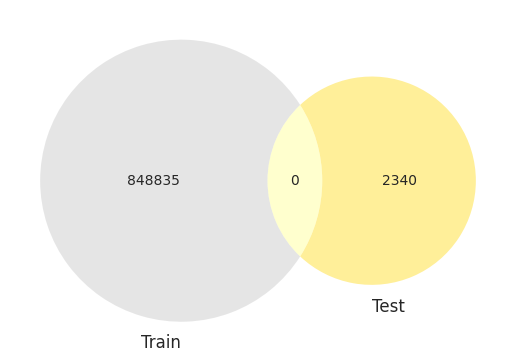

In [18]:
train_df_notarget=df_train.drop(['congestion'], axis = 1)
cols = [e for e in df_test.columns]
common_df = pd.merge(df_train, df_test, how='inner', on=cols)
# depict venn diagram
venn2_unweighted(subsets = (len(df_train) , len(df_test) , len(common_df)), set_labels = ('Train', 'Test'), subset_areas = (1, 0.5, 0.1),set_colors = ('silver', 'gold'));

In [19]:
print("=="*30)
print('TRAIN')
print("=="*30)
s=df_train.describe()
display(s.style.set_table_styles([cell_hover, index_names, headers]))
print("=="*30)
print('TEST')
print("=="*30)
s=df_test.describe()
display(s.style.set_table_styles([cell_hover, index_names, headers]))

TRAIN


,x,y,congestion
count,848835.000000,848835.000000,848835.000000
mean,1.138462,1.630769,47.815305
std,0.801478,1.089379,16.799392
min,0.000000,0.000000,0.000000
25%,0.000000,1.000000,35.000000
50%,1.000000,2.000000,47.000000
75%,2.000000,3.000000,60.000000
max,2.000000,3.000000,100.000000


TEST


,x,y
count,2340.000000,2340.000000
mean,1.138462,1.630769
std,0.801649,1.089611
min,0.000000,0.000000
25%,0.000000,1.000000
50%,1.000000,2.000000
75%,2.000000,3.000000
max,2.000000,3.000000


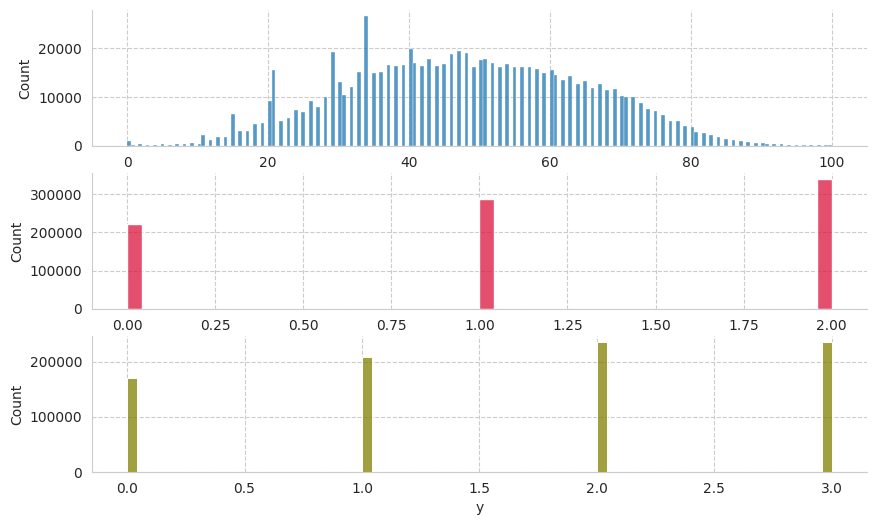

In [20]:
fig, axs = plt.subplots(3,1,figsize=(10,6))
sns.histplot(data=df_train, x="congestion", ax=axs[0]);
sns.histplot(data=df_train, x="x", ax=axs[1], color="crimson");
sns.histplot(data=df_train, x="y", ax=axs[2], color="olive");

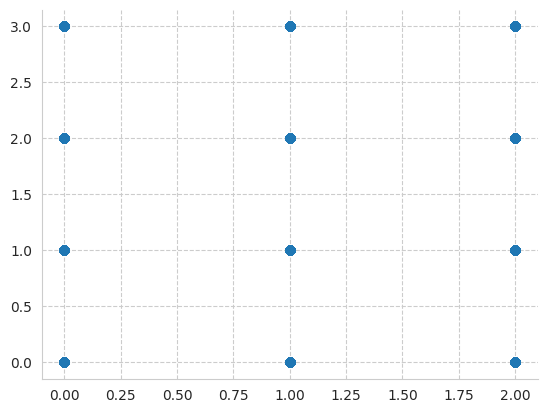

In [21]:
plt.scatter(df_train.x,df_train.y);

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 848835 entries, 0 to 848834
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time        848835 non-null  datetime64[ns]
 1   x           848835 non-null  int64         
 2   y           848835 non-null  int64         
 3   direction   848835 non-null  object        
 4   congestion  848835 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 38.9+ MB


In [23]:
# import itertools package
import itertools
from itertools import permutations

df_timeseries_train = pd.DataFrame()
y_unique = list(df_train.y.unique())
x_unique = list(df_train.x.unique())



# create empty list to store the
# combinations
unique_combinations = []

for i in range(len(x_unique)):
    for j in range(len(y_unique)):
        unique_combinations.append((x_unique[i], y_unique[j]))

print(unique_combinations)


df_grouped = df_train.reset_index().groupby(["x","y","direction","time"], as_index=False)[["congestion","row_id"]].agg("first")
df_grouped_test = df_test.reset_index().groupby(["x","y","direction","time"], as_index=False)[["row_id"]].agg("first")
df_grouped_test["congestion"]=np.nan

[(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3)]


In [24]:
list_names = []
list_ts = []

list_names_test = []
list_ts_test = []

for num, (a, b) in tqdm(enumerate(unique_combinations)):

#  print(f"X@{a} and Y@{b} has {df_grouped[(df_grouped.x==a)&(df_grouped.y==b)].direction.unique()}")#df_grouped[(df_grouped.x==a)&(df_grouped.y==b)].direction.unique())#["congestion"]

  local_unique_directions = list(df_grouped[(df_grouped.x==a)&(df_grouped.y==b)].direction.unique())

  for uniq in local_unique_directions:
    name = f"{a}{b}_{uniq}"
    list_names.append(name)
    local_ts = df_grouped[(df_grouped.x==a)&(df_grouped.y==b)&(df_grouped.direction==uniq)][["time","congestion"]]
    local_ts.rename({"congestion":name}, axis=1, inplace=True)
    local_ts.set_index("time", inplace=True)
    list_ts.append(local_ts)

    local_ts_test = df_grouped_test[(df_grouped_test.x==a)&(df_grouped_test.y==b)&(df_grouped_test.direction==uniq)][["time","congestion"]]
    local_ts_test.rename({"congestion":name}, axis=1, inplace=True)
    local_ts_test.set_index("time", inplace=True)
    list_ts_test.append(local_ts_test)




12it [00:04,  2.46it/s]


In [25]:
df_grouped_test

,x,y,direction,time,row_id,congestion
0,0,0,EB,1991-09-30 12:00:00,848835,NaN
1,0,0,EB,1991-09-30 12:20:00,848900,NaN
2,0,0,EB,1991-09-30 12:40:00,848965,NaN
3,0,0,EB,1991-09-30 13:00:00,849030,NaN
4,0,0,EB,1991-09-30 13:20:00,849095,NaN
...,...,...,...,...,...,...
2335,2,3,WB,1991-09-30 22:20:00,850914,NaN
2336,2,3,WB,1991-09-30 22:40:00,850979,NaN
2337,2,3,WB,1991-09-30 23:00:00,851044,NaN
2338,2,3,WB,1991-09-30 23:20:00,851109,NaN


In [26]:
df_grouped
list_names
dataframe_ts = pd.DataFrame(index = list_ts[0].index)
dataframe_ts_test = pd.DataFrame(index = list_ts_test[0].index)

for ts in list_ts:
  dataframe_ts = pd.concat([dataframe_ts,ts], axis=1)

for ts in list_ts_test:
  dataframe_ts_test = pd.concat([dataframe_ts_test,ts], axis=1)

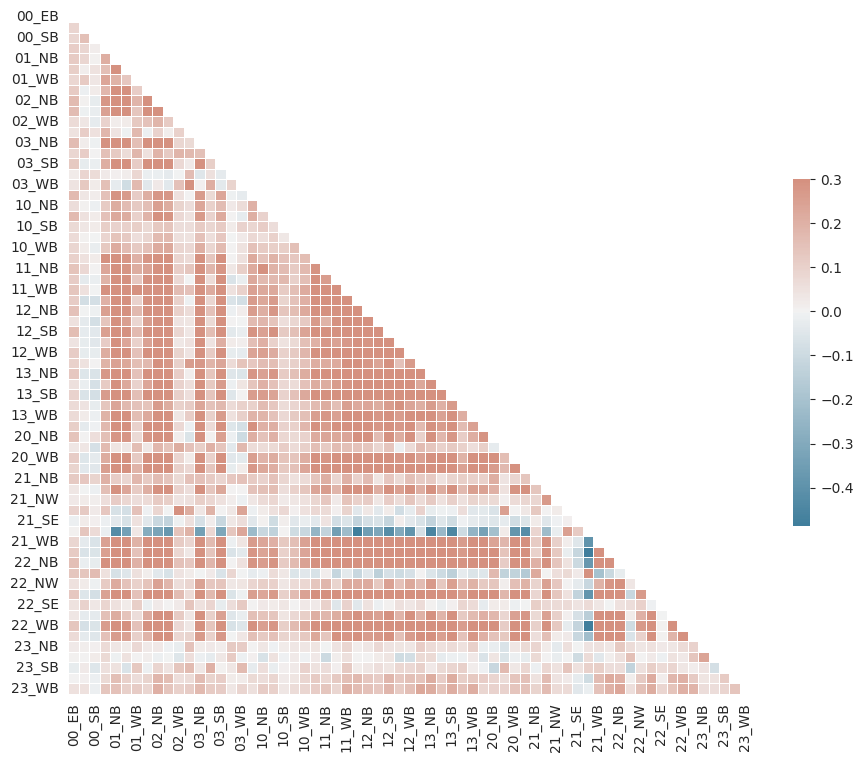

In [27]:
corr = dataframe_ts.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.grid(linestyle='')

In [28]:
print(dataframe_ts_test.shape)
print(dataframe_ts.shape)

(36, 65)
(13059, 65)


In [29]:
list_target_features = list(dataframe_ts.columns)

train_ts_extended = add_datetime_features(dataframe_ts)
test_ts_extended = add_datetime_features(dataframe_ts_test)

In [30]:
train_ts_final, test_ts_final = add_medians(train_ds=train_ts_extended, list_target_features=list_target_features, test_ds=test_ts_extended)
print(train_ts_final.shape)
print(test_ts_final.shape)

(13059, 139)
(36, 139)


In [31]:
def schooltime(train_ts_final,test_ts_final):

  start_school = "1991-08-20"
  end_school = "1991-06-11"

  train_ts_final["school_drop"]=0
  test_ts_final["school_drop"]=0
  train_ts_final["school_pickup"]=0
  test_ts_final["school_pickup"]=0

  train_ts_final.loc[:end_school,:]["school_drop"][(train_ts_final["weekend"]==0)&(train_ts_final["hour"]==8)&(train_ts_final["minute"]==20)]=1
  train_ts_final.loc[start_school:,:]["school_pickup"][(train_ts_final["weekend"]==0)&(train_ts_final["hour"]==15)&(train_ts_final["minute"]==20)]=1

  test_ts_final.loc[:end_school,:]["school_drop"][(test_ts_final["weekend"]==0)&(test_ts_final["hour"]==8)&(test_ts_final["minute"]==20)]=1
  test_ts_final.loc[start_school:,:]["school_pickup"][(test_ts_final["weekend"]==0)&(test_ts_final["hour"]==15)&(test_ts_final["minute"]==20)]=1

  return train_ts_final, test_ts_final

train_ts_final,test_ts_final = schooltime(train_ts_final,test_ts_final)

train_ts_final.shape

(13059, 141)

In [53]:
temporal_known_features = list(set(train_ts_final.columns).difference(set(list_names)))
categorical_features = ['school_pickup',"day",'school_drop','weekend',"weekday",'afternoon','minute',"hour","moment"]
list_targets = list_names.copy()
median_features = [f"{a}_median" for a in list_targets]

In [44]:
print(len())

,23_NE,23_SB,23_SW,23_WB,day,weekday,weekend,hour,minute,afternoon,moment,moment_sin,moment_cos,00_EB_median,00_NB_median
time,,,,,,,,,,,,,,,
1991-04-01 00:00:00,30,70,29,26,1,0,0,0,0,0,0,0.000000,1.000000,35,29
1991-04-01 00:20:00,30,80,29,57,1,0,0,0,20,0,1,0.087156,0.996195,35,29
1991-04-01 00:40:00,30,79,29,48,1,0,0,0,40,0,2,0.173648,0.984808,35,29
1991-04-01 01:00:00,30,77,29,44,1,0,0,1,0,0,3,0.258819,0.965926,35,29
1991-04-01 01:20:00,30,79,29,44,1,0,0,1,20,0,4,0.342020,0.939693,35,29


In [56]:
prediction_steps = len(test_ts_final)

In [54]:
prediction_steps = len(test_ts_final)

#importing the library and developing TFT with training data information
import pytorch_forecasting
max_prediction_length = prediction_steps
max_encoder_length = 504
training_cutoff = df_train["time_id"].max() - max_prediction_length

training = TimeSeriesDataSet(
    df_train[lambda x: x["time_id"] <= training_cutoff],
    time_idx="time_id",
    target="congestion",
    group_ids=["road"],
    min_encoder_length=0,
    max_encoder_length=max_encoder_length,
    min_prediction_length=1,
    max_prediction_length=max_prediction_length,
    static_categoricals=[],
    static_reals=["road"],
    time_varying_known_categoricals=["afternoon","weekend"],
    time_varying_known_reals=["weekend","afternoon","month","day","weekday","time_id","min","max","morning_avg",'PC1','PC2','moment_cos'],
    time_varying_unknown_reals=["congestion"],
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
    allow_missing_timesteps=True
 )

['00_EB_median',
 '00_NB_median',
 '00_SB_median',
 '01_EB_median',
 '01_NB_median',
 '01_SB_median',
 '01_WB_median',
 '02_EB_median',
 '02_NB_median',
 '02_SB_median',
 '02_WB_median',
 '03_EB_median',
 '03_NB_median',
 '03_NE_median',
 '03_SB_median',
 '03_SW_median',
 '03_WB_median',
 '10_EB_median',
 '10_NB_median',
 '10_NE_median',
 '10_SB_median',
 '10_SW_median',
 '10_WB_median',
 '11_EB_median',
 '11_NB_median',
 '11_SB_median',
 '11_WB_median',
 '12_EB_median',
 '12_NB_median',
 '12_NE_median',
 '12_SB_median',
 '12_SW_median',
 '12_WB_median',
 '13_EB_median',
 '13_NB_median',
 '13_NE_median',
 '13_SB_median',
 '13_SW_median',
 '13_WB_median',
 '20_EB_median',
 '20_NB_median',
 '20_SB_median',
 '20_WB_median',
 '21_EB_median',
 '21_NB_median',
 '21_NE_median',
 '21_NW_median',
 '21_SB_median',
 '21_SE_median',
 '21_SW_median',
 '21_WB_median',
 '22_EB_median',
 '22_NB_median',
 '22_NE_median',
 '22_NW_median',
 '22_SB_median',
 '22_SE_median',
 '22_SW_median',
 '22_WB_median

In [55]:
test_ts_final

,00_EB,00_NB,00_SB,01_EB,01_NB,01_SB,01_WB,02_EB,02_NB,02_SB,...,22_SW_median,22_WB_median,23_EB_median,23_NB_median,23_NE_median,23_SB_median,23_SW_median,23_WB_median,school_drop,school_pickup
time,,,,,,,,,,,,,,,,,,,,,
1991-09-30 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,54,71,49,59,27,70,19,52,0,0
1991-09-30 12:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53,73,45,57,27,70,20,41,0,0
1991-09-30 12:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,54,74,50,59,26,71,15,48,0,0
1991-09-30 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,54,73,45,59,25,70,18,46,0,0
1991-09-30 13:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,54,74,52,58,27,70,15,36,0,0
1991-09-30 13:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55,74,46,56,28,70,17,42,0,0
1991-09-30 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,54,75,49,58,27,70,15,42,0,0
1991-09-30 14:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55,77,49,58,27,70,15,47,0,0
1991-09-30 14:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55,78,49,58,27,72,16,45,0,0


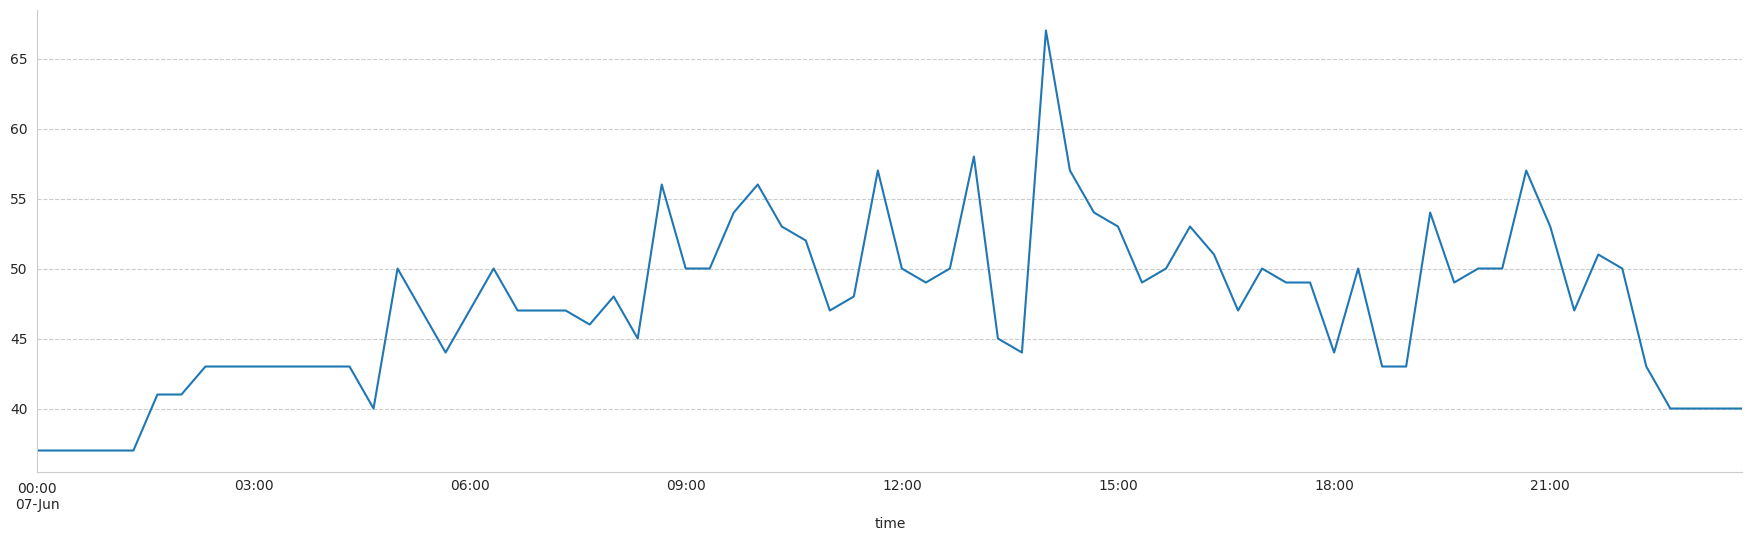

In [50]:
fig, ax = plt.subplots(figsize=(22,6))

train_ts_final.loc["1991-06-07","00_EB_median"].plot(ax=ax);

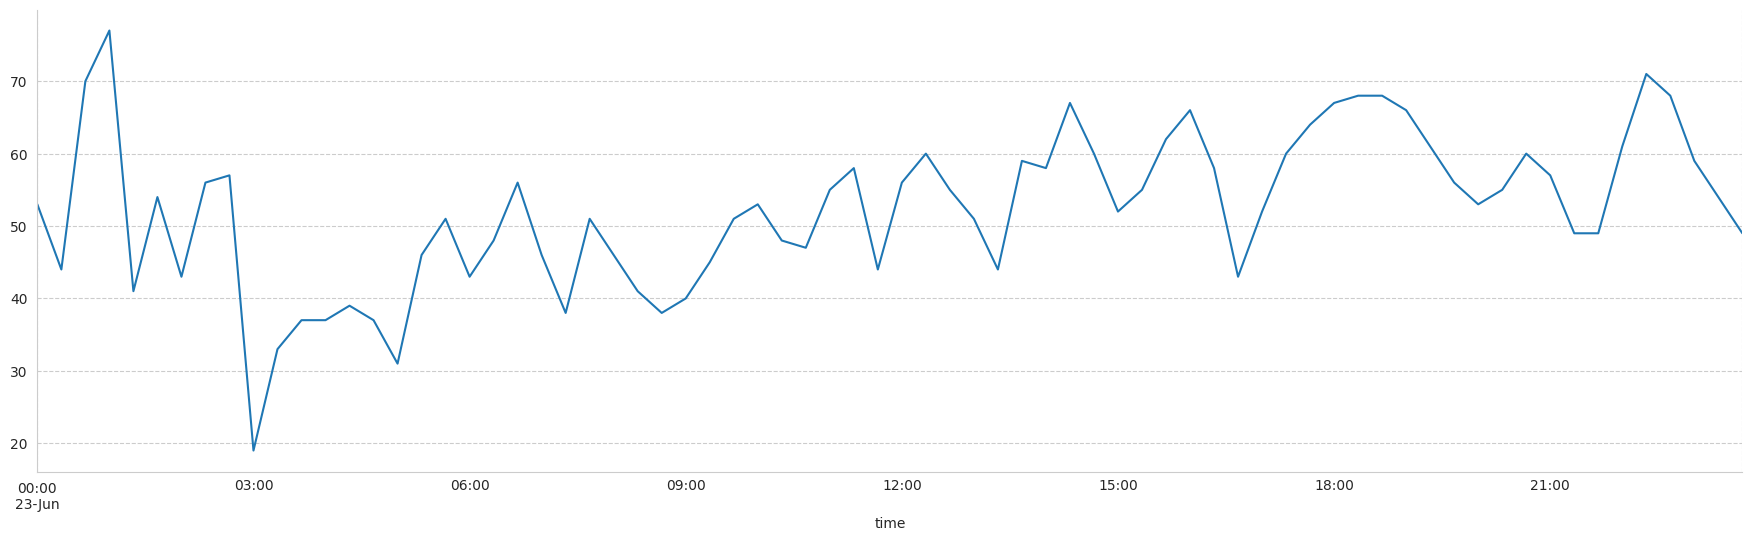

In [35]:
fig, ax = plt.subplots(figsize=(22,6))
train_ts_final.loc["1991-06-23","02_SB"].plot(ax=ax);

In [36]:


entry = 8:15
exit = 15:15


train_ts_final

SyntaxError: ignored